In [21]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [22]:
data = pd.read_csv('../best-artworks-dataset/artists.csv',encoding='utf-8')
data.drop(["id", "years", "bio", "wikipedia"], axis=1, inplace=True)
data.sample(5)

,name,genre,nationality,paintings
31,Rembrandt,Baroque,Dutch,262
9,Gustav Klimt,"Symbolism,Art Nouveau",Austrian,117
17,Frida Kahlo,"Primitivism,Surrealism",Mexican,120
24,Sandro Botticelli,Early Renaissance,Italian,164
43,Piet Mondrian,Neoplasticism,Dutch,84


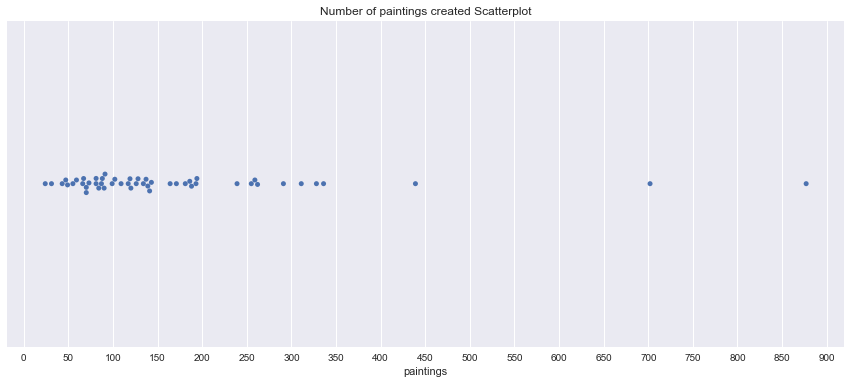

In [23]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn')
sea.swarmplot(x=data['paintings'])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50))
plt.title("Number of paintings created Scatterplot")
plt.show()

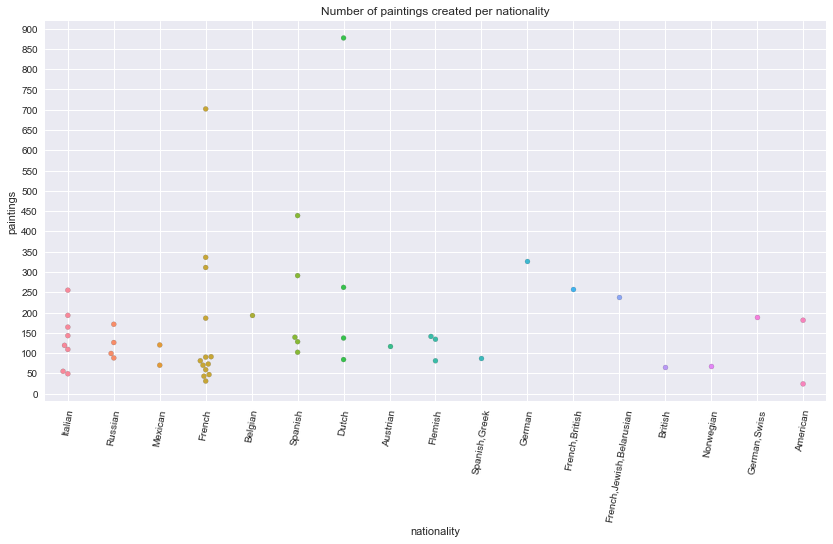

In [24]:
plt.figure(figsize=(14,7))
sea.swarmplot(x=data['nationality'], y=data['paintings'], linewidth=.15)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(50))
plt.gca().xaxis.grid(which='major')
plt.title("Number of paintings created per nationality")
plt.xticks(rotation=80)
plt.show()

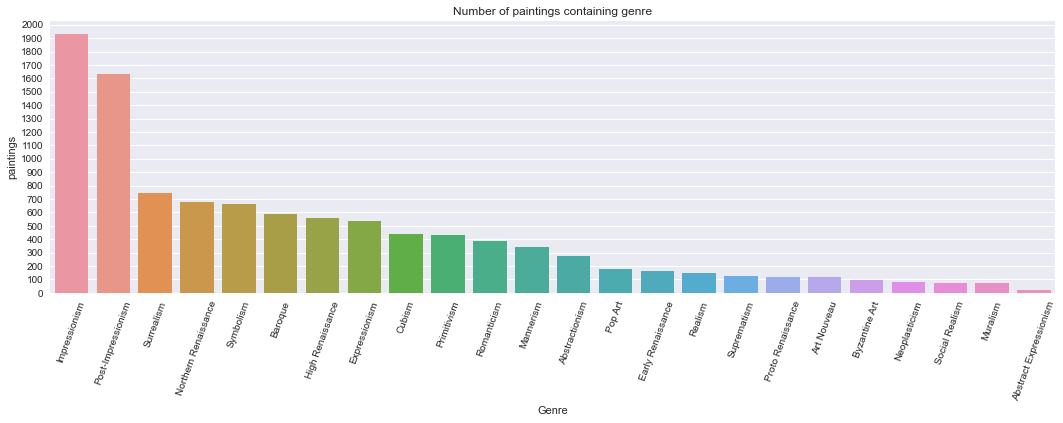

In [25]:
# Prepare dictionary for genre paintings
genre_appear = {}
df = data.groupby("genre").paintings.agg('sum')
for gs, nr in df.items():
    gs = gs.split(',')
    for g in gs:
        genre_appear[g] = genre_appear.get(g, 0) + nr
        
genre_appear = dict(sorted(genre_appear.items(), key=lambda item: item[1], reverse=True))

# plotting phase
plt.figure(figsize=(18,5))
sea.barplot(x=0, y=1, data=pd.DataFrame(genre_appear.items()))

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
plt.xticks(rotation=70)
plt.xlabel("Genre")
plt.ylabel("paintings")
plt.title("Number of paintings containing genre")
plt.show()

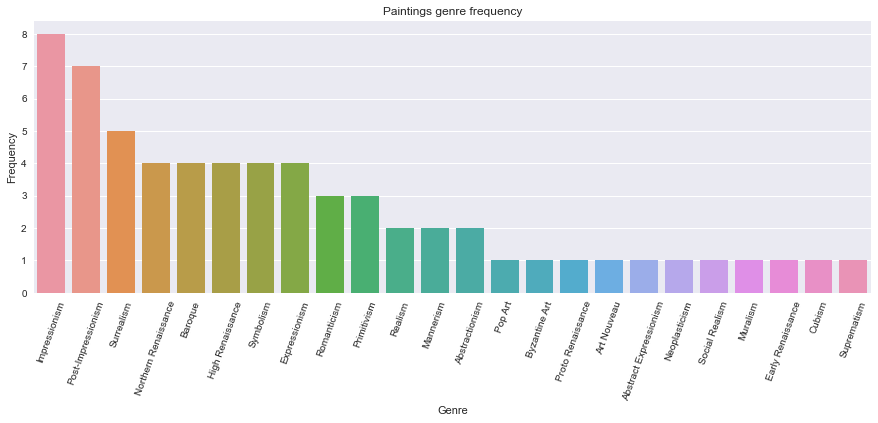

In [26]:
# Creating the dictionary for singular genres frequency
gen_dict = {} 

for key, val in data.genre.value_counts().to_dict().items():
    if ',' in key:
        gens = key.split(',')
        for gen in gens:
            gen_dict[gen] = gen_dict.get(gen, 0) + val
    else:
        gen_dict[key] = gen_dict.get(key, 0) + val

gen_dict = dict(sorted(gen_dict.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(15,5))
sea.barplot(x=0, y=1, data=pd.DataFrame(gen_dict.items()))

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.xticks(rotation=70)
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Paintings genre frequency")
plt.show()

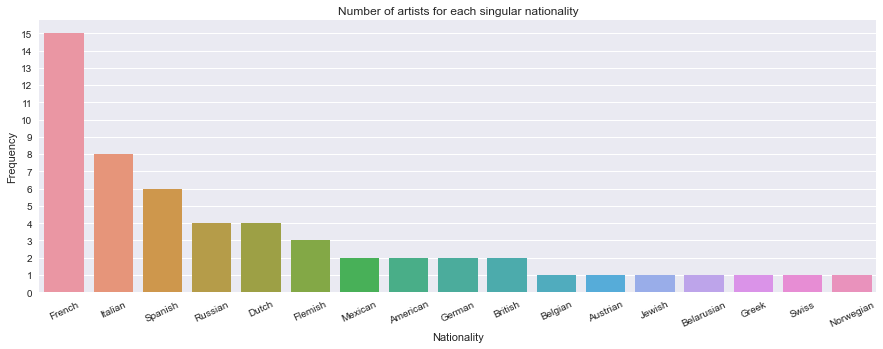

In [27]:
# Creating the dictionary for singular nationalities frequency
nat_dict = {} 

for key, val in data.nationality.value_counts().to_dict().items():
    if ',' in key:
        nats = key.split(',')
        for nat in nats:
            nat_dict[nat] = nat_dict.get(nat, 0) + val
    else:
        nat_dict[key] = nat_dict.get(key, 0) + val

nat_dict = dict(sorted(nat_dict.items(), key=lambda item: item[1], reverse=True))

# Plotting nationalities
plt.figure(figsize=(15,5))
sea.barplot(x=0, y=1, data=pd.DataFrame(nat_dict.items()))

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.xticks(rotation=25)
plt.xlabel("Nationality")
plt.ylabel("Frequency")
plt.title("Number of artists for each singular nationality")
plt.show()